Implement Gradient Descent For Neural Network (or Logistic Regression)
Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving insurance_data.csv to insurance_data.csv


{'insurance_data.csv': b'age,affordibility,bought_insurance\r\n22,1,0\r\n25,0,0\r\n47,1,1\r\n52,0,0\r\n46,1,1\r\n56,1,1\r\n55,0,0\r\n60,0,1\r\n62,1,1\r\n61,1,1\r\n18,1,0\r\n28,1,0\r\n27,0,0\r\n29,0,0\r\n49,1,1\r\n55,1,1\r\n25,0,1\r\n58,1,1\r\n19,0,0\r\n18,1,0\r\n21,1,0\r\n26,0,0\r\n40,1,1\r\n45,1,1\r\n50,1,1\r\n54,1,1\r\n23,0,0\r\n'}

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df['bought_insurance'],test_size=0.2, random_state=25)

In [ ]:
X_train_scaled = X_train
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test
X_test_scaled['age'] = X_test_scaled['age'] / 100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

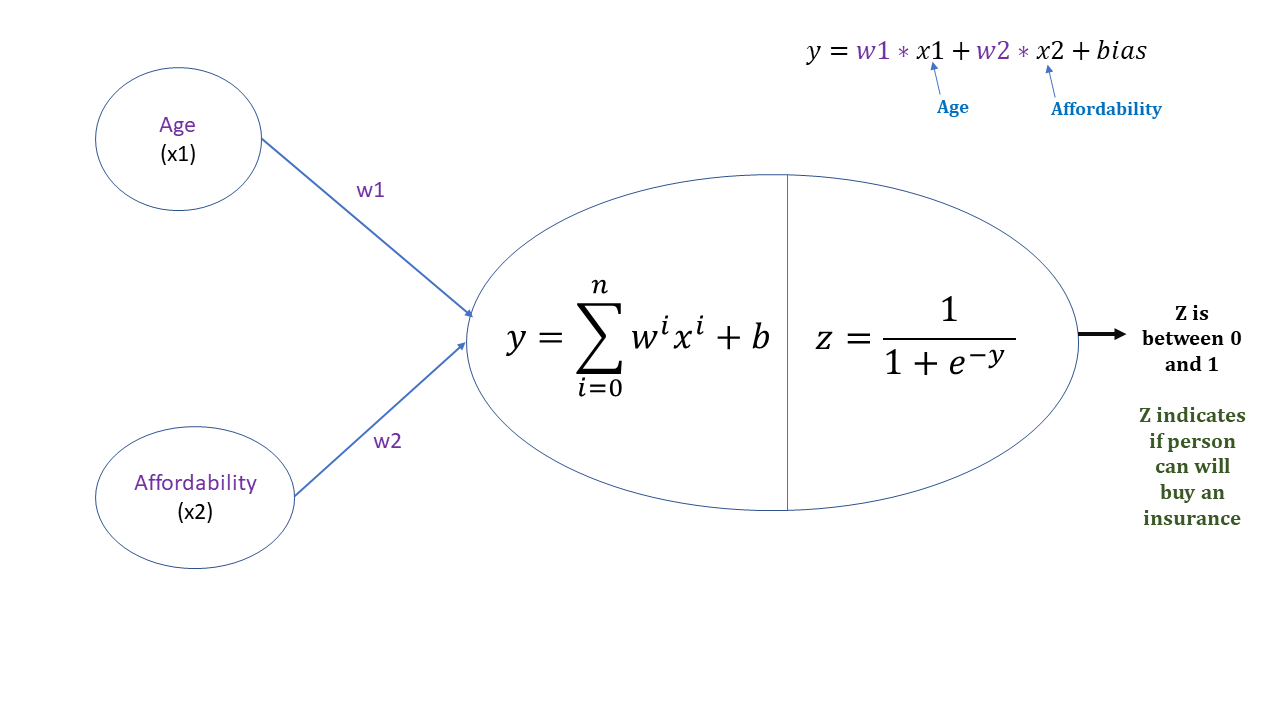

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs= 5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 7ms/step - loss: 0.4571 - accuracy: 0.7619
Epoch 2502/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4570 - accuracy: 0.7619
Epoch 2503/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4570 - accuracy: 0.7619
Epoch 2504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4570 - accuracy: 0.7619
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4569 - accuracy: 0.7619
Epoch 2506/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.4569 - accuracy: 0.7619
Epoch 2507/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4568 - accuracy: 0.7619
Epoch 2508/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.4568 - accuracy: 0.7619
Epoch 2509/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4568 - accuracy: 0.7619
Epoch 2510/5000
1/1 [==============================] 

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 21ms/step - loss: 0.3644 - accuracy: 0.8333


[0.3643586337566376, 0.8333333134651184]

In [ ]:
model.predict(X_test_scaled)

array([[0.8051081 ],
       [0.45623055],
       [0.14782654],
       [0.59246093],
       [0.8217818 ],
       [0.8991737 ]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [ ]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.496753 ],
        [2.0159636]], dtype=float32), array([-3.1809063], dtype=float32))

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(-4)

0.01798620996209156

In [ ]:
X_test

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(0.28, 1)

0.5924609314235101

In [ ]:
prediction_function(0.18, 1)

0.45623054559213816

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

All right now comes the time to implement our final gradient descent function !! yay !!!

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<= loss_threshold:
            break

    return w1, w2, bias


In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.3878)

Epoch:0, w1:0.9837869563955651, w2:0.9836349706289264, bias:-0.09434091451297852, loss:0.6337611337951452
Epoch:1, w1:0.9717133902358323, w2:0.9726671647165521, bias:-0.17807582926863336, loss:0.6160466582065474
Epoch:2, w1:0.9633615250100513, w2:0.9665773286247006, bias:-0.2522963871537539, loss:0.6023814159651417
Epoch:3, w1:0.9582984480207083, w2:0.964793808417574, bias:-0.31811597300715877, loss:0.5918246528839993
Epoch:4, w1:0.956100975004341, w2:0.9667354746875167, bias:-0.37661086033285496, loss:0.5836042681181556
Epoch:5, w1:0.9563724384017087, w2:0.9718429299026208, bias:-0.4287816861187213, loss:0.5771121554072791
Epoch:6, w1:0.9587523596857008, w2:0.9795983862782012, bias:-0.4755323020089, loss:0.571884529227207
Epoch:7, w1:0.9629206359906212, w2:0.9895362448880939, bias:-0.517661709829536, loss:0.5675763533893183
Epoch:8, w1:0.9685979212530869, w2:1.0012468656633569, bias:-0.5558648714205964, loss:0.5639357461863704
Epoch:9, w1:0.9755436222671806, w2:1.0143758092363984, bia

(5.473112649120809, 2.0796615149410127, -3.240431995611089)

In [ ]:
coef, intercept

(array([[5.496753 ],
        [2.0159636]], dtype=float32), array([-3.1809063], dtype=float32))